#Titanic Survival Analysis

This Titanic survival analysis assignment provides a great opportunity to apply the Python concepts you've been learning, including NumPy, Pandas, and data visualization. By working with real-world Titanic passenger data, you’ll be able to use your skills to explore patterns, analyze survival factors, and create insightful visualizations.

Titanic survival analysis involves examining historical data about passengers aboard the RMS Titanic and understanding the factors that influenced their likelihood of survival. This type of analysis helps you explore relationships between variables such as age, sex, class, and fare, and how they impacted survival outcomes during the disaster.

This hands-on exercise encourages you to independently apply the techniques you've learned while also conducting your own research to solve problems. Along the way, you can use resources like ChatGPT to seek guidance if needed. This approach reinforces your data analysis skills and helps build the critical ability to solve real-world problems in a self-directed manner.

## Problem Statement

Analyze and visualize the Titanic passenger data to gain insights into survival factors. Manipulate the dataset, calculate, and visualize key survival metrics such as survival rates, passenger demographics, and class-based survival patterns, which are crucial in understanding the factors that influenced survival during the disaster.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Titanic_Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding the Data:

`PassengerId`: This unique ID for each row doesn't influence the target variable.

`Survived`: This is the outcome variable we aim to predict, where:
- 1 indicates survival
- 0 indicates the passenger did not survive

`Pclass(Passenger Class)`: Reflecting the passenger's socio-economic status, this ordinal categorical feature has three levels:
- 1 for Upper Class
- 2 for Middle Class
- 3 for Lower Class

`Name`, `Sex`, and `Age` are .

`SibSp` represents the total count of a passenger's siblings and spouse aboard.

`Parch` counts the passenger's parents and children on board.

`Ticket` shows the passenger's ticket number.

`Fare` indicates how much the passenger paid for the journey.

`Cabin` denotes the passenger's cabin number.

`Embarked` indicates the port where the passenger boarded the Titanic, with three categorical options:
- C for Cherbourg
- Q for Queenstown
- S for Southampton


## MCQ 1: Number of Rows and Columns in the Dataset

**Question: How many rows and columns are present in the Titanic dataset?**

A) 891 rows and 12 columns

B) 714 rows and 10 columns

C) 1,000 rows and 15 columns

D) 891 rows and 11 columns


In [ ]:
df.shape

(891, 12)

The shape attribute of the dataframe returns the n.of rows and columns in the dataset

## MCQ 2: Passenger Class Distribution
**Question: How many passengers were in the third class?**

A) 491

B) 216

C) 323

D) 184


In [ ]:
df[df['Pclass']==3].shape

(491, 12)

we filter the dataframe with `df['Pclass']==3` with people only in third class and then find the shape to get rows and columns

## MCQ 3: Missing Values

**Question: Which column had the highest number of missing values?**

A) Age  
B) Embarked  
C) Fare  
D) Cabin

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Out of 891 rows, Cabin has only 204 non-null values.

## Instructions for Handling Missing Values

Follow below instructions for handling missing values in the following columns:


*   `Age`: Impute the missing values using the median age of the dataset.
*   `Cabin`: Drop the entire column, as a large portion of the data is missing.
*   `Embarked`: Impute the missing values using the mode (most frequent value) of the column.

**Note:** Strictly adhere to the above instructions when handling missing values, as subsequent questions will be based on the dataset after these transformations.

In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [ ]:
df=df.drop("Cabin",axis=1)

In [ ]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## MCQ 4: Identifying Columns with the Wrongly Assigned Category Type
**Question:**

Which of the following columns are incorrectly assigned as numerical types and should be treated as categorical variables?

A) Fare

B) PassengerId

C) Pclass

D) Age


In [ ]:
def changeTostr(x):
  if x==1:
    return 'Upper Class'
  if x==2:
    return 'Middle Class'
  if(x==3):
    return 'Lower Class'
df['Pclass']=df['Pclass'].apply(changeTostr)

It is mentioned above that '1' means 'Upper Class', '2' means 'Middle Class' and '3' means 'Lower Class' so we convert it into categorical data which makes it easier to read.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Now that data pre-processing is complete, proceed to analyze the different factors that impacted passenger survival rates by creating visualizations. These visualizations will help identify patterns and insights into how variables such as age, sex, fare, embarkation point, passenger class, and family size influenced the likelihood of survival.


## MCQ 5: Age Distribution and Survival

**Question:**  
Create a histogram to examine the relationship between `Age` and survival rates in the Titanic disaster.  
- The X-axis should represent age groups.
- The Y-axis should represent the survival rate.

**Based on the visualization, what can be concluded about the relationship between age and survival rate?**

A) Older passengers had higher survival rates.  
B) Younger passengers, particularly children, had higher survival rates.  
C) There was no clear trend between age and survival.  
D) Middle-aged passengers had the highest survival rate.


- We calculate the survival rate by age group as = (Count of no. of 1s)/(No. of people)*100

- Count of no. of 1s would simply be the sum as the no.of 0s won't be counted.

- Keep no. of bins as 20.

(array([23.,  0.,  1.,  1.,  3.,  5.,  7.,  4.,  6.,  5., 12.,  0.,  3.,
         3.,  2.,  0.,  2.,  0.,  0., 11.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

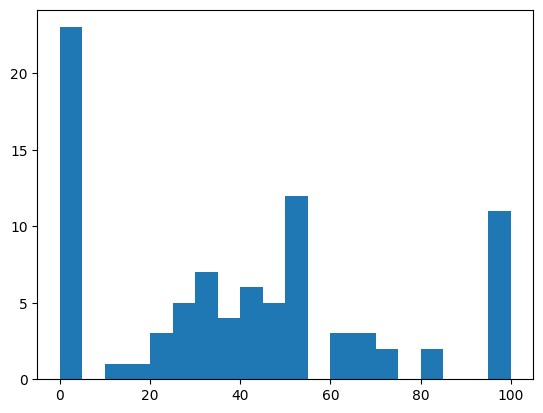

In [ ]:
gk=df[["Age","Survived"]].groupby('Age')['Survived'].apply(lambda x: (x.sum() / len(x)) * 100)
plt.hist(gk,bins=20)

We calculate the survival rate by age by (count of No.of 1s in survived column / Total No. of People)*100. Count of no.of 1s would simply be the sum as the No.of 0s as 0s won't be counted while calculating the sum and no. of people would be the length of the array for the particular age as the group by function returns an array of the survived column for every age.

## MCQ 6: Survival Rate - Men vs Women
**Question:**

Create a visualization to examine the relationship between sex and survival rates in the Titanic disaster.

*   The X-axis should represent sex.
*   The Y-axis should represent survival rate.

**Based on the visualization, which statement best describes the relationship between sex and survival rate?**

A) Men had a higher survival rate than women.

B) Women had a higher survival rate than men.

C) Men and women had nearly equal survival rates.

D) Sex did not affect survival rates.


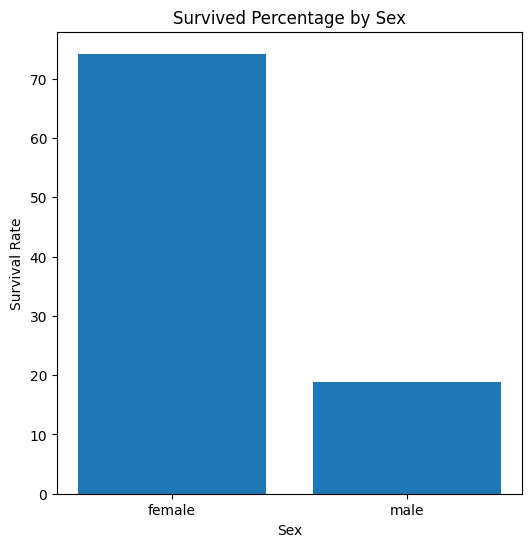

In [ ]:
gk=df[['Sex', 'Survived']].groupby('Sex', as_index = False).apply(lambda x: (x.sum() / len(x)) * 100)
plt.figure(figsize=(6, 6))
plt.bar(gk['Sex'], gk['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survived Percentage by Sex')
plt.show()

Similarly, for the above question, we calculate the survival rate by 'gender' and then plot the bar plot for visualisation.


## MCQ 7: Embarkation Point and Survival

**Question:**  
Create a visualization to examine the relationship between `Embarked` (port of embarkation) and survival rates.  
- The X-axis should represent the embarkation points.
- The Y-axis should represent survival rate.

**Based on the visualization, what conclusion can be made about the survival rate based on embarkation point?** (Select all that apply)

A) Passengers from Southampton had the lowest survival rate.  
B) Passengers from Cherbourg had the highest survival rate.  
C) Passengers from Queenstown had the highest survival rate.  
D) There was no significant difference based on embarkation point.


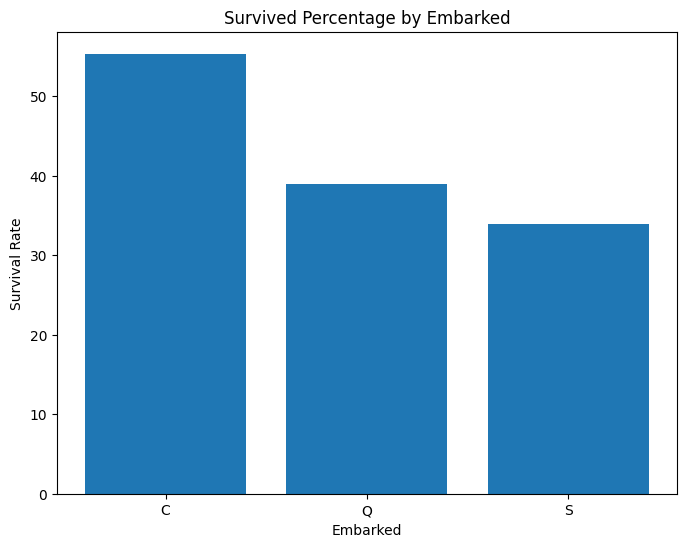

In [ ]:
gk=df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).apply(lambda x: (x.sum() / len(x)) * 100)
plt.figure(figsize=(8, 6))
plt.bar(gk['Embarked'], gk['Survived'])
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.title('Survived Percentage by Embarked')
plt.show()

Similarly, for the above question, we calculate the survival rate by 'embarked' and then plot the bar plot for visualisation.


## MCQ 8: Family Size and Survival

**Question:**  
Create a visualization to examine the relationship between family size (number of family members onboard) and survival rates in the Titanic disaster.  
- The X-axis should represent family size (calculated as `SibSp + Parch + 1`).
- The Y-axis should represent survival rate.

**Based on the visualization, which statement best describes the relationship between family size and survival rate?**

A) Larger family sizes are associated with higher survival rates.  
B) Larger family sizes are associated with lower survival rates.  
C) Family size has no significant impact on survival rates.  
D) Survival rates are equally distributed across all family sizes.


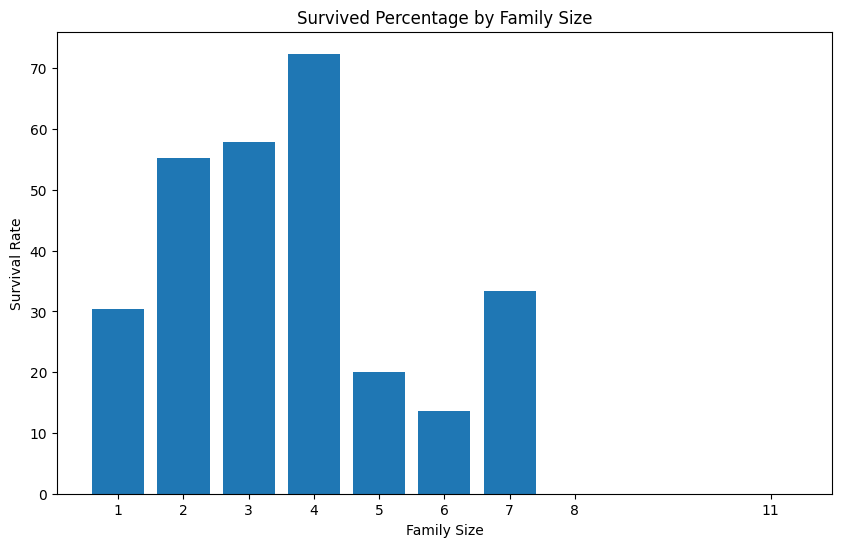

In [ ]:
df['Family_Size']=df['SibSp'] + df['Parch'] + 1
gk=df[['Family_Size', 'Survived']].groupby('Family_Size',as_index=False)['Survived'].apply(lambda x: (x.sum() / len(x)) * 100)
gk
plt.figure(figsize=(10, 6))
plt.bar(gk['Family_Size'], gk['Survived'])
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survived Percentage by Family Size')
plt.xticks(gk['Family_Size'])
plt.show()


We calculate the family size using formula, family size = Sibsp + Parch + 1. <br>
Then we calculate survival rate based on family size and plot a bar graph for visualisation.